Instructions for implementing quantum entanglement:
- Write a Qiskit program to create a two-qubit quantum circuit.
-  Apply Hadamard gates (H-gates) to both qubits to create a superposition.
-  Apply a CNOT gate to entangle the two qubits.
-  Measure the qubits to obtain the final measurement outcomes.
-  Simulate the circuit using the Qiskit simulator and observe the measurement results

In [1]:
#importing the libraries

from qiskit import *

In [2]:
# Create a quantum circuit
qc = QuantumCircuit(2, 2)

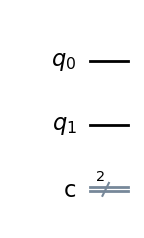

In [3]:
#draw the circuit
qc.draw(output="mpl")

In [4]:
#Apply Hadamard gates (H-gates) to both qubits to create a superposition.
qc.h(0)
qc.h(1)

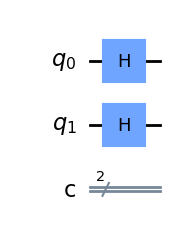

In [5]:
#see the circuit
qc.draw(output="mpl")

In [6]:
#Apply a CNOT gate to entangle the two qubits.
qc.cx(0,1)#control is 0 and target is 1

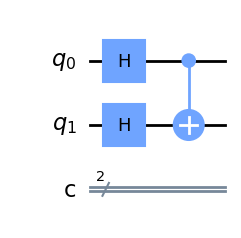

In [7]:
#see the circuit
qc.draw(output="mpl")

In [8]:
#Measure the qubits to obtain the final measurement outcomes.

qc.measure([0,1],[0,1])

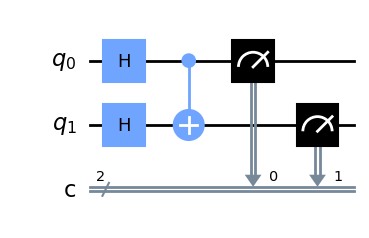

In [9]:
#see the circuit
qc.draw(output="mpl")

In [10]:
#Simulate the circuit using the Qiskit simulator and observe the measurement results
simulator=Aer.get_backend('qasm_simulator')

In [11]:
job=execute(qc,backend=simulator,shots=1000)#default shots=1024

In [12]:
result=job.result()

In [13]:
result

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='74896e1f-e1bf-48d2-8eeb-7a87c0920172', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 244, '0x0': 262, '0x3': 239, '0x1': 255}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-114', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=488698767, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0029664, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'fusion': {'enabled': False}}, time_taken=0.0082561)], date=2023-06-05T09:35:32.692411, status=COMPLETED, header=None, metadata={'parallel_experiments': 1, 'omp_enabled': Tru

In [14]:
#get the counts
counts=result.get_counts(qc)

In [15]:
print(counts)

{'10': 244, '00': 262, '11': 239, '01': 255}


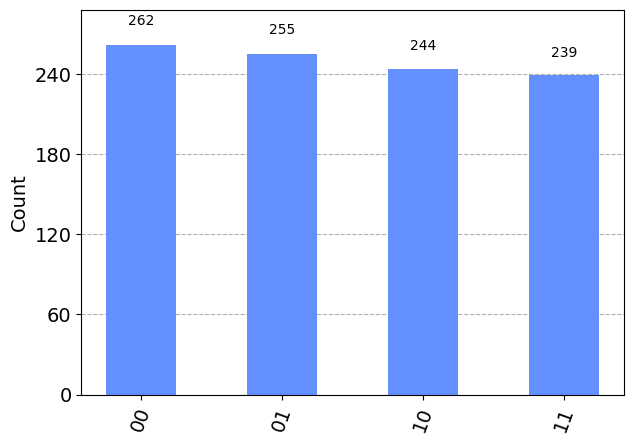

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [18]:
total_counts = sum(counts.values())
prob_counts = {outcome: count/total_counts for outcome, count in counts.items()}

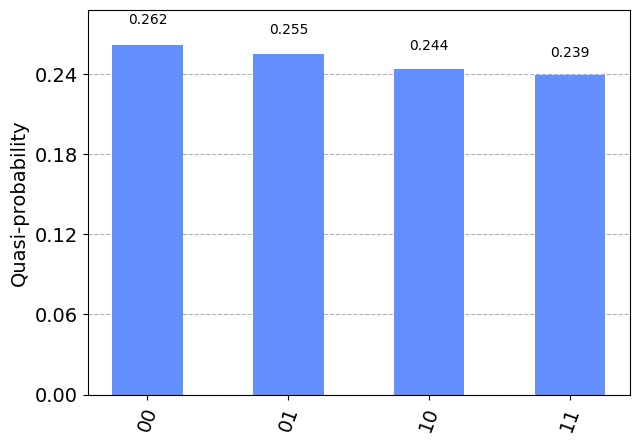

In [20]:
plot_histogram(prob_counts)

**Analysis of the Results**
To begin, both qubits are initially in the state |0>. Upon applying HAdamard gates to both qubits, they enter a superposition state expressed as follows:
|ψ⟩ = (1/√2) * (|00⟩ + |11⟩) + (1/√2) * (|10⟩ + |01⟩)
This signifies that the first qubit has an equal 50% chance of being in the state |0⟩ or |1⟩. The second qubit becomes entangled with the first qubit and therefore adopts the same state.

Upon applying a CNOT gate to the entangled states mentioned above, the resultant state remains unchanged:
|ψ⟩ = (1/√2) * (|00⟩ + |11⟩) + (1/√2) * (|10⟩ + |01⟩)

In this entangled state, measuring the first qubit causes the second qubit to collapse, and vice versa.

Lastly, we utilize the qiskit simulator to measure the outcomes. Due to the probabilistic nature of the simulator, the measurement results exhibit some level of randomness. Consequently, we do not observe an equal distribution for each outcome.